
<a id='intro'></a>
## Introduction

>The dataset for analysis is obtained from AAR Healthcare and it contains information obtained from 1st January, 2017 to 30th June 2018. It contains infomation which 73001 rows and 24 columns of data "

In [106]:
#importing neccessary libraries 
from openpyxl import workbook 
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl import load_workbook 
import pandas as pd 
import numpy as np 

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

import os

## Data Wrangling


Here, we are going to look at the general properties associated with our dataset. For example checking for missing values, confirming the number of rows and columns in the dataset, checking for uniqueness etc.

In [47]:
#loading our data
data_workbook = load_workbook("C:\\Users\\Angela\\Downloads\\AAR Practical\\SampleData.xlsx")

data_worksheet = data_workbook.active

data=pd.DataFrame(data_worksheet.values, index=None)



In [48]:
data.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
61849,2017-01-12 00:00:00,GP Visit,PAMR6929,1993-09-12 00:00:00,Male,New Patient,Seen,Provider 3,GENERAL PRACTITIONER,Scheme 4,...,0,7804.72,0,0,0,9004.72,200,8804.72,0,9004.72
7402,2017-04-10 00:00:00,GP Visit,PAMR1246,1982-10-29 00:00:00,Male,New Patient,Seen,Provider 4,GENERAL PRACTITIONER,Scheme 4,...,0,960,0,0,0,2160,0,2160,0,2160
28703,2017-02-01 00:00:00,Dentist Capitated Visit,PAMR19455,1989-09-29 00:00:00,Female,New Patient,Waiting,Provider 11,DENTIST,Scheme 2,...,0,3333.38,0,0,0,6933.38,0,6933.38,0,6933.38
14437,2018-04-08 00:00:00,GP Visit,PAMR13876,1986-03-21 00:00:00,Female,New Patient,Seen,Provider 16,GENERAL PRACTITIONER,Scheme 1,...,0,2563.86,0,0,0,3763.86,500,3263.86,0,3763.86
63956,2017-02-23 00:00:00,Pharmacy Visit,PAMR7437,1979-05-09 00:00:00,Male,New Patient,Seen,Provider 13,PHARMACIST,Scheme 4,...,0,1609.8,0,0,0,1609.8,0,1609.8,0,1609.8
70076,2018-04-13 00:00:00,GP Visit,PAMR8987,1990-01-04 00:00:00,Female,New Patient,Seen,Provider 20,GENERAL PRACTITIONER,Scheme 5,...,3900,1969.91,0,0,0,7069.91,0,7069.91,0,7069.91
64772,2017-01-19 00:00:00,Pharmacy Visit,PAMR7615,1985-10-10 00:00:00,Female,New Patient,Waiting,Provider 5,PHARMACIST,Scheme 4,...,0,5520.8,0,0,0,5520.8,0,5520.8,0,5520.8
55593,2018-05-28 00:00:00,Pharmacy Visit (External),PAMR5418,1985-01-19 00:00:00,Female,New Patient,Seen,Provider 20,PHARMACIST,Scheme 2,...,0,992.1,0,0,0,992.1,0,992.1,0,992.1
9970,2018-06-02 00:00:00,Pharmacy Visit (Internal),PAMR12923,1947-01-01 00:00:00,Male,New Patient,Seen,Provider 20,PHARMACIST,Scheme 1,...,0,4704,0,0,0,4704,0,4704,0,4704
13437,2017-04-26 00:00:00,GP Visit,PAMR13677,2003-09-01 00:00:00,Male,New Patient,Seen,Provider 3,GENERAL PRACTITIONER,Scheme 7,...,2900,2302.22,0,0,0,6952.22,0,6952.22,0,6952.22


#### Putting first row as the header

In [49]:
#set column names equal to values in row index position 0
data.columns = data.iloc[0]


In [50]:
data.head()

,Date Of Service,Visit Type,Patient File No.,Date Of Birth.,Gender.,Appointment Purpose,Appointment Status,Provider,Service,Scheme,...,Lab Tests,Medication,Ultrasound,X-Ray,Dental Revenue,Total,Patient Share,Corporate Share,Refund Amount.,Final Amount
0,Date Of Service,Visit Type,Patient File No.,Date Of Birth.,Gender.,Appointment Purpose,Appointment Status,Provider,Service,Scheme,...,Lab Tests,Medication,Ultrasound,X-Ray,Dental Revenue,Total,Patient Share,Corporate Share,Refund Amount.,Final Amount
1,2017-02-11 00:00:00,Specialist 1st visit,PAMR0001,2013-09-16 00:00:00,Male,New Patient,Seen,Provider 3,PEDIATRICIAN,Scheme 2,...,0,991.6,0,0,0,2941.6,0,2941.6,0,2941.6
2,2017-04-10 00:00:00,GP Visit,PAMR0001,2013-09-16 00:00:00,Male,New Patient,Seen,Provider 3,GENERAL PRACTITIONER,Scheme 2,...,900,6238.71,0,0,0,8338.71,0,8338.71,0,8338.71
3,2017-04-10 00:00:00,GP Visit,PAMR0001,2013-09-16 00:00:00,Male,New Patient,Seen,Provider 3,GENERAL PRACTITIONER,Scheme 2,...,900,6238.71,0,0,0,8338.71,0,8338.71,0,8338.71
4,2017-05-11 00:00:00,Specialist 1st visit,PAMR0001,2013-09-16 00:00:00,Male,New Patient,Waiting,Provider 17,PEDIATRICIAN,Scheme 2,...,5300,0,0,0,0,7250,0,7250,0,7250


In [51]:
data.shape

(73001, 24)

There are 73001 rows and 24 columns 

In [52]:
#checking whether there is an empty set
data.isnull().sum()

0
Date Of Service        0
Visit Type             0
Patient File No.       0
Date Of Birth.         0
Gender.                0
Appointment Purpose    0
Appointment Status     0
Provider               0
Service                0
Scheme                 0
Visit Fee              0
Consultation           0
OP Procedures          0
OP Packages            0
Lab Tests              0
Medication             0
Ultrasound             0
X-Ray                  0
Dental Revenue         0
Total                  0
Patient Share          0
Corporate Share        0
Refund Amount.         0
Final Amount           0
dtype: int64

There are no missing values

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73001 entries, 0 to 73000
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date Of Service      73001 non-null  object
 1   Visit Type           73001 non-null  object
 2   Patient File No.     73001 non-null  object
 3   Date Of Birth.       73001 non-null  object
 4   Gender.              73001 non-null  object
 5   Appointment Purpose  73001 non-null  object
 6   Appointment Status   73001 non-null  object
 7   Provider             73001 non-null  object
 8   Service              73001 non-null  object
 9   Scheme               73001 non-null  object
 10  Visit Fee            73001 non-null  object
 11  Consultation         73001 non-null  object
 12  OP Procedures        73001 non-null  object
 13  OP Packages          73001 non-null  object
 14  Lab Tests            73001 non-null  object
 15  Medication           73001 non-null  object
 16  Ultr

Date should not be in a string format but a datetime format

In [54]:
data.describe()

,Date Of Service,Visit Type,Patient File No.,Date Of Birth.,Gender.,Appointment Purpose,Appointment Status,Provider,Service,Scheme,...,Lab Tests,Medication,Ultrasound,X-Ray,Dental Revenue,Total,Patient Share,Corporate Share,Refund Amount.,Final Amount
count,73001,73001,73001,73001,73001,73001,73001,73001,73001,73001,...,73001,73001,73001,73001,73001,73001,73001,73001,73001,73001
unique,363,38,20147,10534,4,5,4,20,19,21,...,467,34567,24,56,51,40729,279,41143,8,40733
top,2017-04-24 00:00:00,GP Visit,PAMR7665,1988-01-01 00:00:00,Female,New Patient,Seen,Provider 20,GENERAL PRACTITIONER,Scheme 1,...,0,0,0,0,0,1200,0,2500,0,1200
freq,480,32582,71,531,40806,72907,61329,12544,45672,14894,...,51357,13330,70962,72320,72489,1965,55778,1736,72994,1953


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73001 entries, 0 to 73000
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date Of Service      73001 non-null  object
 1   Visit Type           73001 non-null  object
 2   Patient File No.     73001 non-null  object
 3   Date Of Birth.       73001 non-null  object
 4   Gender.              73001 non-null  object
 5   Appointment Purpose  73001 non-null  object
 6   Appointment Status   73001 non-null  object
 7   Provider             73001 non-null  object
 8   Service              73001 non-null  object
 9   Scheme               73001 non-null  object
 10  Visit Fee            73001 non-null  object
 11  Consultation         73001 non-null  object
 12  OP Procedures        73001 non-null  object
 13  OP Packages          73001 non-null  object
 14  Lab Tests            73001 non-null  object
 15  Medication           73001 non-null  object
 16  Ultr

### Data cleaning 

In this stage, we want to work on the outliers identified in our Data Wrangling stage.

##### 1. Renaming columns 

In [56]:
data = data.rename(columns={'Date Of Service': 'Date_Of_Service', 'Visit Typye': 'Visit_Type', 'Patient File No.':'Patient_File_No','Date Of Birth.':'DateOfBirth','Gender.':'Gender','Appointment Purpose':'Appointment_Purpose','Appointment Status':'Appointment_Status','Visit Fee':'Visit_Fee','OP Procedures':'Op_Procecures','OP Packages':'OP_Packages','Lab Tests':'Lab_Tests','Dental Revenue':'Dental_Revenue','Patient Share':'Patient_Share','Corporate Share':'Corporate_Share','Refund Amount.':'Refund_Amount','Final Amount':'Final_Amount'})

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73001 entries, 0 to 73000
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date_Of_Service      73001 non-null  object
 1   Visit Type           73001 non-null  object
 2   Patient_File_No      73001 non-null  object
 3   DateOfBirth          73001 non-null  object
 4   Gender               73001 non-null  object
 5   Appointment_Purpose  73001 non-null  object
 6   Appointment_Status   73001 non-null  object
 7   Provider             73001 non-null  object
 8   Service              73001 non-null  object
 9   Scheme               73001 non-null  object
 10  Visit_Fee            73001 non-null  object
 11  Consultation         73001 non-null  object
 12  Op_Procecures        73001 non-null  object
 13  OP_Packages          73001 non-null  object
 14  Lab_Tests            73001 non-null  object
 15  Medication           73001 non-null  object
 16  Ultr

##### 2. Changing Date type from string to datetime 

In [58]:
import datetime
from datetime import datetime


In [59]:
#Change the DateOfBirth and Date of Service column to Datetime object
data['DateOfBirth'] = pd.to_datetime(data['DateOfBirth'], format="%Y-%m-%d %H:%M:%S", errors='coerce')


data['Date_Of_Service']=pd.to_datetime(data['Date_Of_Service'],format="%Y-%m-%d %H:%M:%S", errors='coerce')

#Dropping missing values in the DateOfBirth column  
data = data.dropna(subset=['DateOfBirth'])





#### 3. Introducing a new Column called Age 

In [60]:
#Calculate age in years and round to a whole number
today = datetime.today()

data['Age'] = round((today - data['DateOfBirth']).astype('<m8[Y]'))


In [61]:
data.sample(20)

,Date_Of_Service,Visit Type,Patient_File_No,DateOfBirth,Gender,Appointment_Purpose,Appointment_Status,Provider,Service,Scheme,...,Medication,Ultrasound,X-Ray,Dental_Revenue,Total,Patient_Share,Corporate_Share,Refund_Amount,Final_Amount,Age
21030,2018-04-07,GP Visit,PAMR16965,1986-06-07,Male,New Patient,Seen,Provider 20,GENERAL PRACTITIONER,Scheme 5,...,2054.18,0,0,0,3254.18,50,3204.18,0,3254.18,36.0
27057,2018-06-07,Pharmacy Visit (Self),PAMR18966,1982-08-06,Female,New Patient,Seen,Provider 11,PHARMACIST,Scheme 2,...,378,0,0,0,378,0,378,0,378,40.0
44919,2017-03-10,Specialist 1st visit,PAMR25801,1990-06-21,Female,New Patient,Seen,Provider 19,OBS/GYNAECOLOGIST,Scheme 5,...,423.93,0,0,0,4323.93,50,4273.93,0,4323.93,32.0
54125,2017-05-17,Pharmacy Visit,PAMR5069,2008-08-23,Male,New Patient,Seen,Provider 7,PHARMACIST,Scheme 3,...,2301.44,0,0,0,2301.44,0,2301.44,0,2301.44,14.0
24042,2018-03-30,GP Review,PAMR17847,2017-07-31,Female,New Patient,Seen,Provider 8,GENERAL PRACTITIONER,Scheme 15,...,3512.58,0,0,0,5612.58,0,5612.58,0,5612.58,5.0
4743,2018-06-04,Pharmacy Visit (Internal),PAMR11617,1969-04-01,Female,New Patient,Seen,Provider 20,PHARMACIST,Scheme 12,...,1422,0,0,0,1422,0,1422,0,1422,53.0
41253,2018-04-11,DENTAL VIST,PAMR24387,1978-08-03,Male,New Patient,Waiting,Provider 17,DENTIST,Scheme 1,...,0,0,0,10000,12000,4500,7500,0,12000,44.0
38818,2018-06-04,Pharmacy Visit (External),PAMR2347,2014-02-01,Male,New Patient,Seen,Provider 5,PHARMACIST,Scheme 5,...,440.46,0,0,0,440.46,0,440.46,0,440.46,9.0
33099,2017-03-17,GP Visit,PAMR21559,1999-01-01,Female,New Patient,Seen,Provider 14,GENERAL PRACTITIONER,Scheme 4,...,383.5,0,0,0,1583.5,0,1583.5,0,1583.5,24.0
57373,2018-03-17,Specialist 1st visit,PAMR5864,1986-02-08,Female,New Patient,Seen,Provider 20,OBS/GYNAECOLOGIST,Scheme 2,...,3918,0,0,0,5868,0,5868,0,5868,37.0


In [62]:
#checking age below 18

(data['Age']<=18).value_counts()


False    53760
True     19239
Name: Age, dtype: int64

In [63]:
data['Age'].max()

92.0

There are 19,239 persons who are below 18 years old and 53,760 persons who are 19 years and above

#### 4. Adding the age group column

In [64]:
#Creating Age groups
bins=[1,10,20,30,40,50,60,70,80,90,100]
labels=['1-18','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

#### 5. Introducing a month column

In [65]:
# Create a new column with the month name
data['month'] = data['Date_Of_Service'].dt.strftime('%B')

## Exploratory Data Analysis

In this stage, we are going to pose questions as identified after our dataset has been cleaned and answer each question with visuals. The visuals will basically be a relationship between two variables.

In [66]:
#Creating a User defined function
def countplot(col1,col2):
    '''which inputs  values to be investigated in the X axis against the counts(y axis) '''
    sns.countplot(
x=col1 , hue=col2)



### QUESTIONS 

#### 1. Monthly utilization per provider 

Monthly utilization per provider is the amount of service or resources used by a particular provider in a month. 

In [67]:
#checking for the uniqueness in the provider column

(data['Provider']).unique()

array(['Provider 3', 'Provider 17', 'Provider 2', 'Provider 12',
       'Provider 4', 'Provider 6', 'Provider 20', 'Provider 14',
       'Provider 16', 'Provider 9', 'Provider 1', 'Provider 13',
       'Provider 8', 'Provider 7', 'Provider 11', 'Provider 5',
       'Provider 15', 'Provider 19', 'Provider 18'], dtype=object)

The hospital has a total of 18 providers 

In [68]:
data['Date_Of_Service'].max()

Timestamp('2018-06-30 00:00:00')

In [69]:
data['Date_Of_Service'].min()

Timestamp('2017-01-01 00:00:00')

The data obtained is from 1st January 2017 to 30th June 2018 

In [70]:
 #filter the data between the specified period
start_date = pd.to_datetime('2017-01-01')
end_date = pd.to_datetime('2018-06-30')
difference_in_days = data[(data['Date_Of_Service'] >= start_date) & (data['Date_Of_Service'] <= end_date)]



In [71]:
# group the data by Provider and month and count the number of days worked in each group
days_worked_per_month = difference_in_days.groupby(['Provider', pd.Grouper(key='Date_Of_Service', freq='M')])['Date_Of_Service'].count()

In [72]:
#Display full days worked for each provider
pd.set_option("display.max_rows", None)
days_worked_per_month

Provider     Date_Of_Service
Provider 1   2017-01-31          208
             2017-02-28          139
             2017-03-31          235
             2017-04-30          492
             2017-05-31          247
             2017-06-30          248
             2018-01-31          260
             2018-02-28          259
             2018-03-31          235
             2018-04-30          215
             2018-05-31          247
             2018-06-30          480
Provider 11  2017-01-31          458
             2017-02-28          528
             2017-03-31          650
             2017-04-30         1060
             2017-05-31          567
             2017-06-30          376
             2018-01-31          652
             2018-02-28          492
             2018-03-31          470
             2018-04-30          456
             2018-05-31          515
             2018-06-30          946
Provider 12  2017-01-31          264
             2017-02-28          259
         

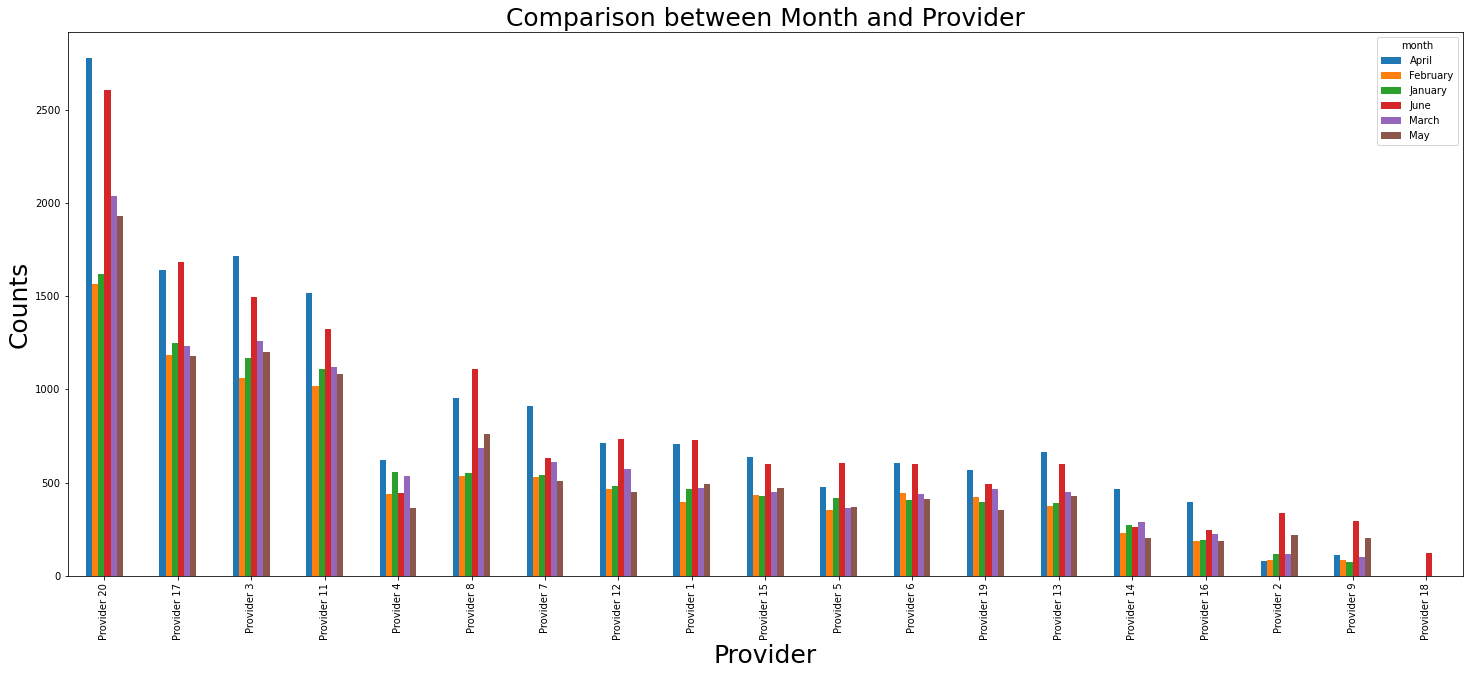

In [122]:
#Graphical represntation between months and provider
data.groupby('Provider')['month'].value_counts().unstack().sort_values(by = 'January' , ascending = False).plot(kind = 'bar',figsize=(25,10))
plt.title('Comparison between Month and Provider',fontsize=25)
plt.xlabel("Provider",fontsize=25)
plt.ylabel("Counts",fontsize=25)

# Get the path to the user's download folder
download_folder = os.path.expanduser("~/Downloads")

# Save the plot as a PNG image in the download folder
plt.savefig(os.path.join(download_folder, "plot1.png"))

#### 2. Scheme Utilization trends

There are different heatlthcare services offered in the hospital and all the total amount of money used in each scheme are mentioned in the Total column. 

For this case, we have to group the scheme and total column and relate it to the Date of service

In [77]:
difference_in_days = data[(data['Date_Of_Service'] >= start_date) & (data['Date_Of_Service'] <= end_date)]

# Group the data by scheme and month and calculate the total amount and total days worked for each scheme and month
grouped_data = difference_in_days.groupby(['Scheme', pd.Grouper(key='Date_Of_Service', freq='M')]).agg({'Total': 'sum'})

grouped_data

0                                Total
Scheme    Date_Of_Service             
Scheme 1  2017-01-31         127849.72
          2017-02-28         146739.84
          2017-03-31        1956171.86
          2017-04-30        3485337.94
          2017-05-31        2729058.74
          2017-06-30        2235906.13
          2018-01-31       10483372.34
          2018-02-28        9861881.74
          2018-03-31       10298552.67
          2018-04-30        8946924.91
          2018-05-31       10003776.74
          2018-06-30       18747669.98
Scheme 10 2017-01-31         427812.41
          2017-02-28         514316.99
          2017-03-31         591366.12
          2017-04-30         681805.68
          2017-05-31         505559.03
          2017-06-30         620060.19
          2018-01-31         736822.36
          2018-02-28         554647.15
          2018-03-31         903209.82
          2018-04-30         688881.37
          2018-05-31          684125.5
          2018-06-30         1559067.1
Scheme 11 2017-03-31          58181.05
          2017-04-30        1006449.14
          2017-05-31        1095717.16
          2017-06-30         1322655.1
          2018-01-31         925899.58
          2018-02-28         814226.62
          2018-03-31          384497.7
          2018-04-30          30264.78
          2018-05-31          19819.12
Scheme 12 2017-01-31         213005.86
          2017-02-28         261117.73
          2017-03-31         480810.24
          2017-04-30         671573.48
          2017-05-31         379151.19
          2017-06-30         464989.31
          2018-01-31         562868.03
          2018-02-28         627980.07
          2018-03-31         580583.56
          2018-04-30         583167.04
          2018-05-31         504127.12
          2018-06-30        1435373.94
Scheme 13 2017-01-31           19637.1
          2017-02-28         237748.29
          2017-03-31         454739.22
          2017-04-30         837784.36
          2017-05-31          545184.9
          2017-06-30          620615.8
          2018-01-31         535730.01
          2018-02-28         358868.13
          2018-03-31         627382.74
          2018-04-30         471592.98
          2018-05-31         589131.11
          2018-06-30        1031047.32
Scheme 14 2017-01-31           15745.8
          2017-02-28          16767.14
          2017-03-31         394280.12
          2017-04-30         938926.88
          2017-05-31         569613.06
          2017-06-30         473748.01
          2018-01-31         500199.93
          2018-02-28         509209.91
          2018-03-31         426475.68
          2018-04-30         488929.77
          2018-05-31         493823.75
          2018-06-30        1105579.52
Scheme 15 2017-01-31         370835.75
          2017-02-28         252487.96
          2017-03-31         224374.62
          2017-04-30         625244.32
          2017-05-31         320267.68
          2017-06-30         398905.32
          2018-01-31         332384.05
          2018-02-28         446803.22
          2018-03-31         573378.87
          2018-04-30         419292.87
          2018-05-31         462138.18
          2018-06-30         967307.42
Scheme 16 2017-01-31         227053.82
          2017-02-28         192397.37
          2017-03-31         180568.69
          2017-04-30         472816.64
          2017-05-31         238329.04
          2017-06-30         215819.02
          2018-01-31         419971.49
          2018-02-28         316984.13
          2018-03-31         336112.06
          2018-04-30         393424.64
          2018-05-31         789653.26
          2018-06-30         1132085.4
Scheme 17 2017-01-31         306349.06
          2017-02-28         245234.57
          2017-03-31         404376.98
          2017-04-30         565108.04
          2017-05-31         487013.73
          2017-06-30         440042.65
          2018-01-31         418352.17
          2018-02-28  

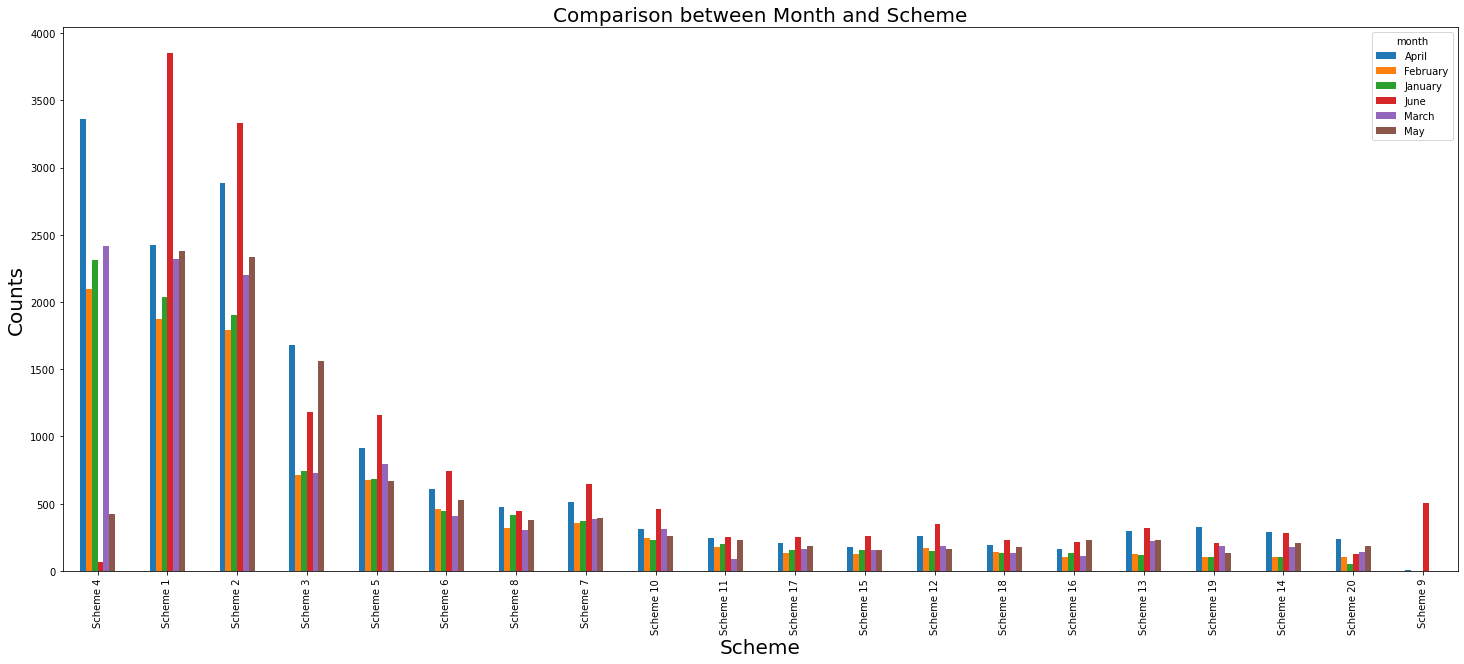

In [123]:
#Graphical representation for Scheme against Month
data.groupby('Scheme')['month'].value_counts().unstack().sort_values(by = 'January' , ascending = False).plot(kind = 'bar',figsize=(25,10))
plt.title('Comparison between Month and Scheme',fontsize=20)
plt.xlabel("Scheme",fontsize=20)
plt.ylabel("Counts",fontsize=20)
# Save the plot as a PNG image in the download folder
plt.savefig(os.path.join(download_folder, "plot2.png"))


#### 3. Average cost per visit for the various service line

In [80]:
average_cost = data.groupby('Service')['Visit_Fee'].mean()

average_cost

Service
COUNSELLOR                0.000000
DENTIST                  81.818182
DERMATOLOGIST           105.172414
ENT SPECIALIST           71.428571
GENERAL PRACTITIONER     80.724553
LABORATORY                0.000000
NURSING                   0.000000
NUTRITION & DIETRY      104.037267
OBS/GYNAECOLOGIST        86.347957
ORTHOPAEDIC SURGEON     142.565041
PEDIATRICIAN             83.739996
PHARMACIST                1.525183
PHYSICIAN               176.733699
PHYSIOTHERAPIST           0.052411
RADIOGRAPHER              0.000000
RADIOLOGY                 0.000000
ULTRASOUND                0.000000
X-RAY                     0.000000
Name: Visit_Fee, dtype: float64

#### 4. Monthly visits trends children vs adults 

In [81]:
#Calculate age in years and round to a whole number
today = datetime.today()

data['Age'] = round((today - data['DateOfBirth']).astype('<m8[Y]'))


In [82]:
#checking age below 18

(data['Age']<=18).value_counts()

False    53760
True     19239
Name: Age, dtype: int64

From observation, there are 19,239 patients who are less than or equal to 18 years old and 53,760 patients who are 19 years and above

In [83]:
# Group visits by month and age
grouped = data.groupby([pd.Grouper(key='DateOfBirth', freq='M'), pd.cut(data['Age'], bins=[0, 18, np.inf])])

# Count the number of visits for each group
result = grouped.size().unstack(level=1)

result

Age,"(0.0, 18.0]","(18.0, inf]"
DateOfBirth,,
1930-09-30,0,2
1930-10-31,0,0
1930-11-30,0,0
1930-12-31,0,0
1931-01-31,0,0
1931-02-28,0,0
1931-03-31,0,0
1931-04-30,0,0
1931-05-31,0,0


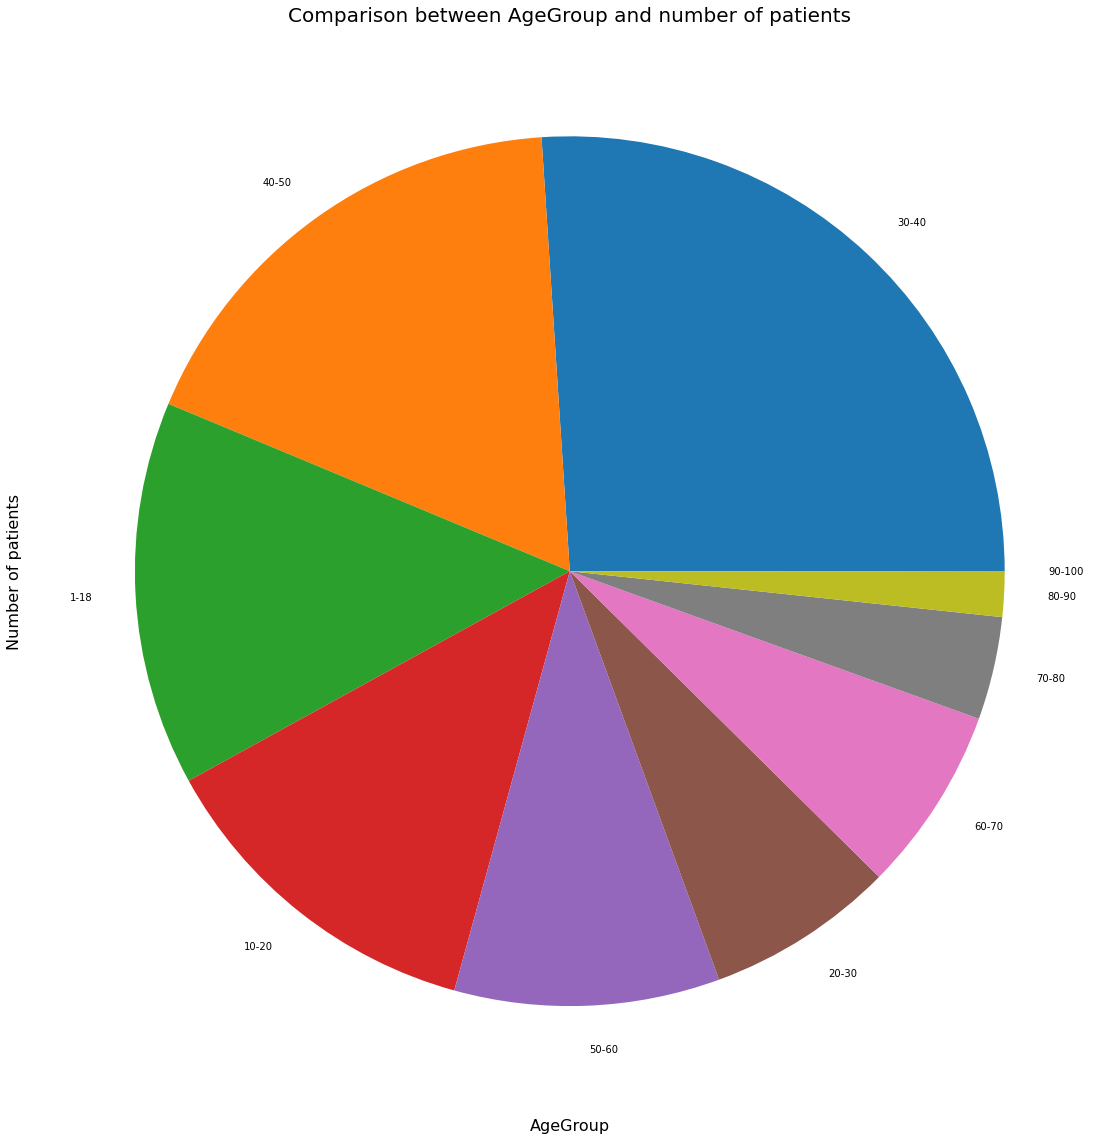

In [127]:
plt.figure(figsize=[20,20])
data.AgeGroup.value_counts().sort_values(ascending=False).plot(kind ='pie')
plt.xticks(rotation=90)
plt.xlabel('AgeGroup', fontsize=16)
plt.ylabel('Number of patients', fontsize=16)
plt.title('Comparison between AgeGroup and number of patients', fontsize=20)


# Save the plot as a PNG image in the download folder
plt.savefig(os.path.join(download_folder, "plot3.png"))

#### Any other insights


#### 5. Does gender affect patients who show up'


In [86]:
#Checking information on gender and Date_Of_Service
data['Date_Of_Service'].groupby(data['Gender']).size()

Gender
Female     40806
Male       32153
Unknown       40
Name: Date_Of_Service, dtype: int64

since 2017-01-01 to 2018-06-30, there were more females than male who went to the hospital for service

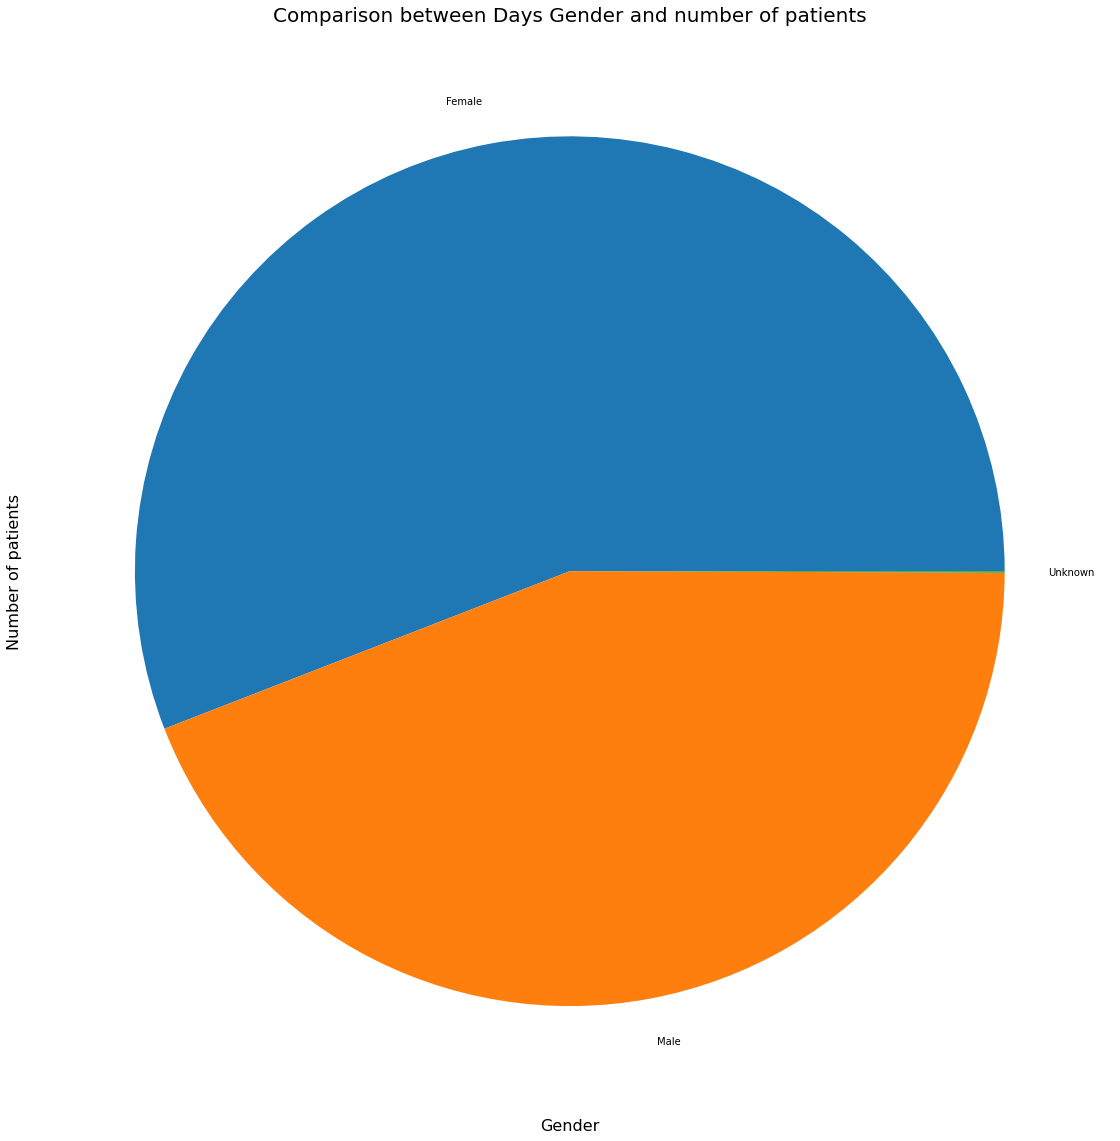

In [129]:
plt.figure(figsize=[20,20])
data.Gender.value_counts().sort_values(ascending=False).plot(kind ='pie')
plt.xticks(rotation=90)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Number of patients', fontsize=16)
plt.title('Comparison between Days Gender and number of patients', fontsize=20)
# Save the plot as a PNG image in the download folder
plt.savefig(os.path.join(download_folder, "plot4.png"))

##### 6. Checking the day of the week for the visit 

In [89]:

#adding a new column called day of the week obtained from the date of service
data['Day_of_week'] = pd.to_datetime(data['Date_Of_Service']).dt.strftime('%A')

In [90]:
data['Date_Of_Service'].groupby(data['Day_of_week']).size()

Day_of_week
Friday       10980
Monday       11732
Saturday     10915
Sunday        6141
Thursday     10470
Tuesday      11459
Wednesday    11302
Name: Date_Of_Service, dtype: int64

From observations, it can be concluded that most patients went to get service on Mondays and the least number went on Sundays

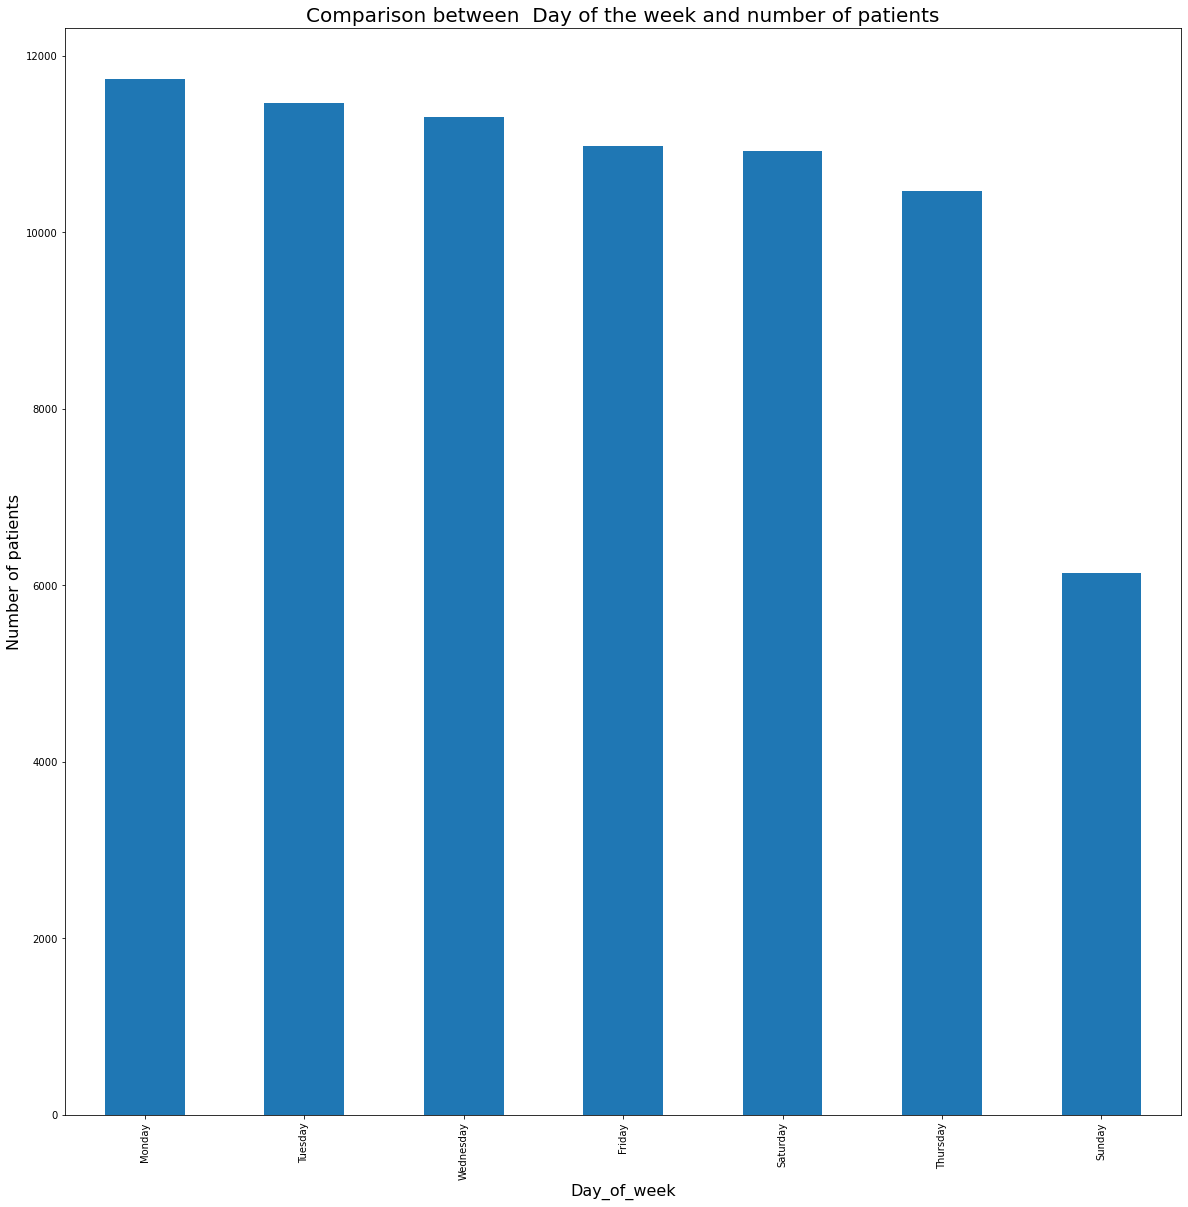

In [130]:
plt.figure(figsize=[20,20])
data.Day_of_week.value_counts().sort_values(ascending=False).plot(kind ='bar')
plt.xticks(rotation=90)
plt.xlabel('Day_of_week', fontsize=16)
plt.ylabel('Number of patients', fontsize=16)
plt.title('Comparison between  Day of the week and number of patients', fontsize=20)

# Save the plot as a PNG image in the download folder
plt.savefig(os.path.join(download_folder, "plot5.png"))

#### 7. Checking the service that gets most and less visits 


In [93]:
data['Date_Of_Service'].groupby(data['Service']).size()

Service
COUNSELLOR                 35
DENTIST                  1265
DERMATOLOGIST              29
ENT SPECIALIST             91
GENERAL PRACTITIONER    45671
LABORATORY               1005
NURSING                  1705
NUTRITION & DIETRY        322
OBS/GYNAECOLOGIST        2864
ORTHOPAEDIC SURGEON       246
PEDIATRICIAN             5160
PHARMACIST              11059
PHYSICIAN                1457
PHYSIOTHERAPIST          1908
RADIOGRAPHER               10
RADIOLOGY                  76
ULTRASOUND                 62
X-RAY                      34
Name: Date_Of_Service, dtype: int64

General practitioner received most visits during the period 

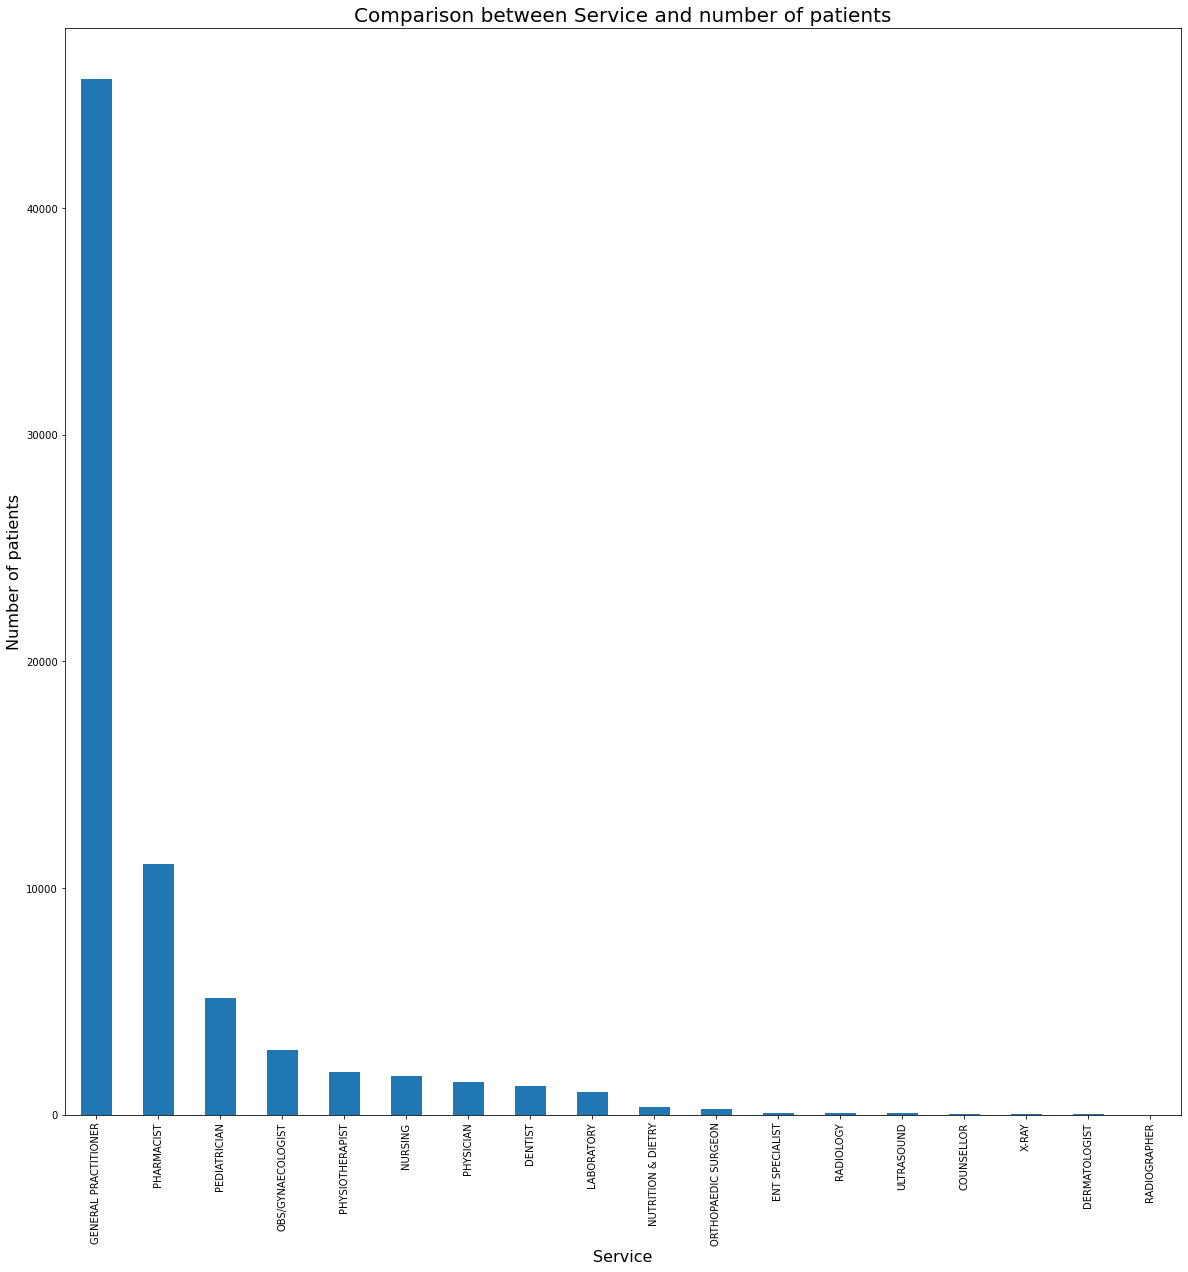

In [131]:
plt.figure(figsize=[20,20])
data.Service.value_counts().sort_values(ascending=False).plot(kind ='bar')
plt.xticks(rotation=90)
plt.xlabel('Service', fontsize=16)
plt.ylabel('Number of patients', fontsize=16)
plt.title('Comparison between Service and number of patients', fontsize=20)

plt.savefig('C:\\Users\\Angela\\Downloads\\plot6.png')